In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
import pandas as pd
import glob
from scipy.stats import poisson
from scipy.stats import multivariate_normal
import pyccl as ccl
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]
%load_ext autoreload
%autoreload 2
sys.path.append('../modules')
import abundance as cl_count
import covariance as covar
import mvp_pdf
import edit

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
Omega_c_true = 0.30711 - 0.048254
Omega_b_true = 0.048254
sigma8_true = .8288
Omegam_true = 0.30711
True_value = [Omega_c_true + Omega_b_true, sigma8_true]
cosmo = ccl.Cosmology(Omega_c = Omega_c_true, Omega_b = Omega_b_true, h = 0.6777, sigma8 = sigma8_true, n_s=0.96)

# Prediction

In [30]:
n_z_bin = [4, 20, 100]
n_logm_bin = [4, 30, 100]
Abundance = []

In [31]:
clc = cl_count.ClusterAbundance()
#choose the halo mass function and mass definition
massdef = ccl.halos.massdef.MassDef('vir', 'critical', c_m_relation=None)
hmd = ccl.halos.hmfunc.MassFuncDespali16(cosmo, mass_def=massdef)
halobias = ccl.halos.hbias.HaloBiasTinker10(cosmo, mass_def= massdef, mass_def_strict=True)
clc.set_cosmology(cosmo = cosmo, hmd = hmd, massdef = massdef)
clc.sky_area = (0.25) * 4 * np.pi
clc.f_sky = clc.sky_area/(4*np.pi)
z_grid = np.linspace(0., 2.1, 2000)
logm_grid = np.linspace(14.1, 15.7, 2001)
clc.compute_multiplicity_grid_MZ(z_grid = z_grid, logm_grid = logm_grid)

In [44]:
Z, LOGM = [], []
for i in range(3):
    z_corner = np.linspace(0.2, 1.2, n_z_bin[i] + 1)
    logm_corner = np.linspace(14.2, 15.6, n_logm_bin[i] + 1)
    Z_bin, logMass_bin = binning(z_corner), binning(logm_corner)
    Z.append(z_corner)
    LOGM.append(logm_corner)
    Abundance.append(clc.Cluster_Abundance_MZ(Redshift_bin = Z_bin, Proxy_bin = logMass_bin, method = 'simps'))

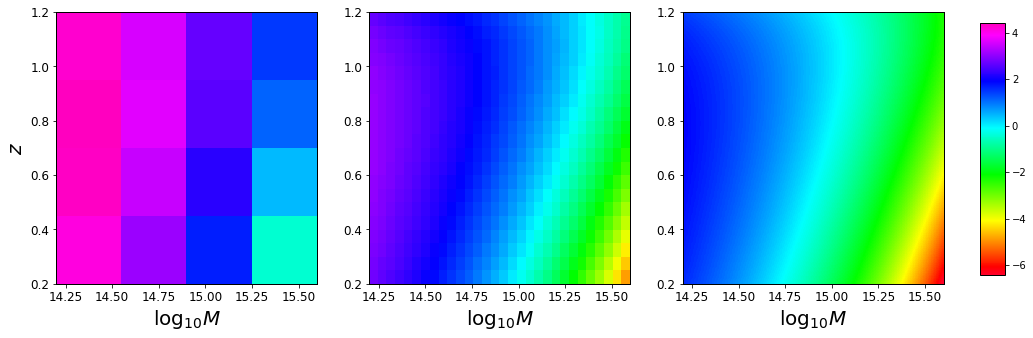

In [94]:
fig, ax = plt.subplots(1, 3, figsize = (17,5))
plt.rcParams['axes.linewidth']= 1
for i in range(3):
    im = ax[i].imshow( np.log10(Abundance[i]), vmin=min(np.log10(Abundance[2].flatten())), vmax=max(np.log10(Abundance[0].flatten())), 
           cmap='gist_rainbow',aspect='auto',extent=[14.2,15.6,0.2,1.2], )
    ax[i].tick_params(axis='both', which = 'major', labelsize= 12)
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.15, 0.02, .7])
fig.colorbar(im, cax=cbar_ax, shrink=0.7)
for i in range(3):
    if i == 0: ax[i].set_ylabel(r'$z$', fontsize=20)
    ax[i].set_xlabel(r'$\log_{10}M$', fontsize=20)
   # ax[i].set_ylabel(r'$z$', fontsize=20)
plt.savefig('binning_scheme.pdf', bbox_inches='tight', dpi=300)